# Deep Learning and Image Recognition

## Word2Vec

Word2vec is a two-layer neural net that  method to processes text. It turns text into a numerical form that deep nets can understand. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus. Word2vec is a particularly computationally-efficient predictive model for learning word embeddings from raw text. 

Word2vec Tutorial: https://www.tensorflow.org/tutorials/word2vec/

<img width="80%" src="https://www.tensorflow.org/images/linear-relationships.png" />


In [1]:
#nltk.download()
import nltk
nltk.download('brown')
nltk.download('movie_reviews')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Bhaarat\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Bhaarat\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [2]:
#import statements
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy

In [3]:
#word2vec on multiple datasets 
b = Word2Vec(brown.sents())
mr = Word2Vec(movie_reviews.sents())

### Word Vectors

In [4]:
mr.wv['computer']

array([-1.0238247e+00, -2.7145344e-01,  4.3470940e-01, -2.6032698e-01,
       -4.7838110e-01,  5.9037399e-01,  2.7269939e-01,  6.3689578e-01,
        1.4080675e-01, -1.2553334e-03, -6.5074280e-02,  2.0737374e-02,
       -1.1626750e+00, -5.2713394e-02,  2.3666260e-01, -5.4914945e-01,
        3.9900562e-01, -5.0616491e-01, -1.4977819e-01,  8.4295861e-02,
        5.7466023e-02,  3.7587926e-01,  2.2557400e-01,  1.2242117e-01,
       -5.2955973e-01, -3.3435792e-01, -6.9346088e-01, -3.4074494e-01,
       -4.9507123e-01, -2.6219916e-01,  1.1904448e+00,  2.3856235e-01,
       -2.3010002e-01,  6.4736046e-02, -1.0513371e-01,  4.0576863e-01,
       -3.7289000e-01, -5.0047427e-01,  4.0071619e-01, -5.5573690e-01,
        1.6559488e-01, -4.9938062e-01, -7.1581268e-01, -2.2752996e-01,
       -1.7538828e-01,  2.0627461e-01, -7.0173210e-01,  4.8802671e-01,
       -4.5006052e-01,  1.6701141e-01, -3.5414693e-01, -5.4548383e-02,
        3.0692497e-01, -2.3699751e-01, -2.6999441e-01,  2.2004531e-01,
      

In [5]:
b.wv['computer']

array([-0.07940453, -0.07175531,  0.02267545, -0.03156141, -0.07820981,
        0.11629295, -0.0110496 ,  0.04285658,  0.1222688 ,  0.06329983,
       -0.04899583, -0.04644055, -0.05409594, -0.05368308, -0.01270822,
       -0.06371433,  0.0154811 , -0.02613473, -0.05858654, -0.04938167,
       -0.03428582,  0.06800458, -0.11155342, -0.00853656, -0.01592036,
        0.14268947, -0.01568147,  0.00717323, -0.01262586,  0.17989458,
       -0.03186284,  0.06745963,  0.01659828, -0.00142495,  0.00360938,
        0.06274924,  0.00931814,  0.02273887,  0.04525409, -0.08655446,
        0.06477398,  0.02766813, -0.03610248, -0.01942658,  0.02164061,
       -0.0364936 , -0.00975378,  0.01789346,  0.04364206,  0.10272039,
        0.09029005, -0.06317742,  0.02534241,  0.05120539, -0.01126417,
        0.01158366,  0.02424658,  0.10407953, -0.13319705,  0.11124567,
       -0.01258658,  0.08077538, -0.07409733, -0.12962797, -0.07076371,
        0.01286007,  0.0810129 , -0.08277148,  0.01085079,  0.02

### Similar words

In [6]:
b.wv.most_similar('great', topn=5)

[('common', 0.8703525066375732),
 ('experience', 0.8533072471618652),
 ('limited', 0.8072453737258911),
 ('part', 0.7962620854377747),
 ('sense', 0.7938699722290039)]

In [7]:
b.wv.most_similar('movie', topn=5)

[('Faith', 0.9656580686569214),
 ('seasonal', 0.9619084596633911),
 ('Queen', 0.9596037864685059),
 ('vigorous', 0.9564119577407837),
 ('Moss', 0.9564051628112793)]

In [8]:
mr.wv.most_similar('drama', topn=5)

[('adventure', 0.8577773571014404),
 ('comedy', 0.8500324487686157),
 ('thriller', 0.8438777327537537),
 ('suspense', 0.831267237663269),
 ('satire', 0.8226327896118164)]

In [9]:
mr.wv.most_similar('money', topn=5)

[('home', 0.7537104487419128),
 ('him', 0.7501980066299438),
 ('chance', 0.7396557331085205),
 ('away', 0.7263778448104858),
 ('attention', 0.7209795117378235)]

### Odd word 

In [10]:
mr.wv.doesnt_match(["movie","action","drama","comedy"])

C:\Users\Bhaarat\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'movie'

In [11]:
mr.wv.doesnt_match(["breakfast", "cereal", "dinner","lunch"])

'dinner'

In [12]:
b.wv.doesnt_match(["breakfast", "cereal", "dinner","lunch"])

'cereal'

### Distance between words

In [13]:
def distance(word1, word2):
    return numpy.linalg.norm(mr.wv[word1]-mr.wv[word2])

In [14]:
distance('computer','tv')

5.3603325

In [15]:
distance('computer','radio')

4.202374

In [16]:
distance('computer','phone')

4.2032933

In [17]:
distance('computer','man')

9.683591

### Visualize Word Embeddings

[[-0.01774131 -0.60704887]
 [ 1.4290282   0.2212499 ]
 [-0.6590559   0.35999084]
 [-0.22109832  0.742994  ]
 [ 0.22265455 -0.14028494]
 [-0.16298506 -0.60301954]
 [-0.26529944  0.26643285]
 [-0.3255028  -0.24031447]]


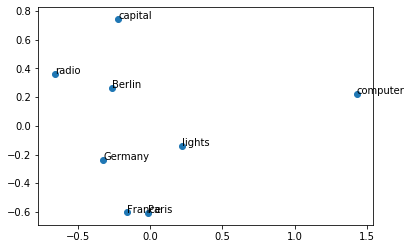

In [18]:
# define training data
words = ['Paris', 'computer', 'radio', 'capital', 'lights', 'France', 'Berlin', 'Germany']

# use model
model = b

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(model.wv[words])

print(result)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()